<a href="https://colab.research.google.com/github/Kvn7373/undergrad-projects/blob/main/KevinAguilarUndergradProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Aatif123-hub/undergrad-projects/refs/heads/main/Kevin%20Galvan/loan_approval_dataset.csv'
df = pd.read_csv(url)
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Missing Data Handling


In [2]:
df[' residential_assets_value'] = df[' residential_assets_value'].replace(0, np.nan)
df[' commercial_assets_value'] = df[' commercial_assets_value'].replace(0, np.nan)
df[' luxury_assets_value'] = df[' luxury_assets_value'].replace(0, np.nan)
df[' bank_asset_value'] = df[' bank_asset_value'].replace(0, np.nan)

In [3]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,45
commercial_assets_value,107


In [4]:
median_of_residential_assets = df[' residential_assets_value'].median()
median_of_commercial_assets = df[' commercial_assets_value'].median()
median_of_bank_assets = df[' bank_asset_value'].median()
df[' residential_assets_value'] = df[' residential_assets_value'].fillna(median_of_residential_assets)
df[' commercial_assets_value'] = df[' commercial_assets_value'].fillna(median_of_commercial_assets)
df[' bank_asset_value'] = df[' bank_asset_value'].fillna(median_of_bank_assets)

In [5]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


Categorical Encoding

In [6]:
df.replace({
    " education": {' Not Graduate': 0, ' Graduate': 1},
    " self_employed": {' No': 0, ' Yes': 1},
    " loan_status": {' Rejected': 0, ' Approved': 1}
}, inplace=True)

<ipython-input-6-91db88c04349>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [7]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000.0,17600000.0,22700000,8000000.0,1
1,2,0,0,1,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000.0,0
2,3,3,1,0,9100000,29700000,20,506,7100000.0,4500000.0,33300000,12800000.0,0
3,4,3,1,0,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000.0,0
4,5,5,0,1,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000.0,500000.0,3300000,800000.0,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000.0,2900000.0,11000000,1900000.0,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000.0,12400000.0,18100000,7300000.0,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000.0,700000.0,14100000,5800000.0,1


Drop uneccesary values


In [8]:
cols = ['loan_id']
df = df.drop(columns = cols, axis=1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000.0,17600000.0,22700000,8000000.0,1
1,0,0,1,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000.0,0
2,3,1,0,9100000,29700000,20,506,7100000.0,4500000.0,33300000,12800000.0,0
3,3,1,0,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000.0,0
4,5,0,1,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000.0,0


Independent Values(X), Dependent Value(Y), Split into Train and Test sets

In [9]:
  Y = df[" loan_status"]
  X = df.drop([' loan_status'], axis=1)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Feature Scaling

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train

array([[-0.2998054 ,  0.99096323,  0.99620048, ..., -0.78891097,
        -0.64603797, -1.01568375],
       [-0.8902526 , -1.00911918,  0.99620048, ..., -0.95190515,
         1.20000444,  1.8827227 ],
       [-0.2998054 , -1.00911918, -1.00381401, ..., -0.46292259,
         0.96786737,  2.09856148],
       ...,
       [ 0.2906418 , -1.00911918,  0.99620048, ...,  1.21358907,
         1.13367957,  0.74186059],
       [ 0.881089  , -1.00911918, -1.00381401, ..., -0.60263189,
         0.65835128,  0.4951877 ],
       [-0.8902526 , -1.00911918,  0.99620048, ...,  0.5848972 ,
         0.10564397, -0.55317208]])

Model Training

In [12]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction)


Evaluation Metrics

In [13]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.51%


In [14]:
report = classification_report(Y_test, Y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       331
           1       0.94      0.94      0.94       523

    accuracy                           0.93       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



Visualizations


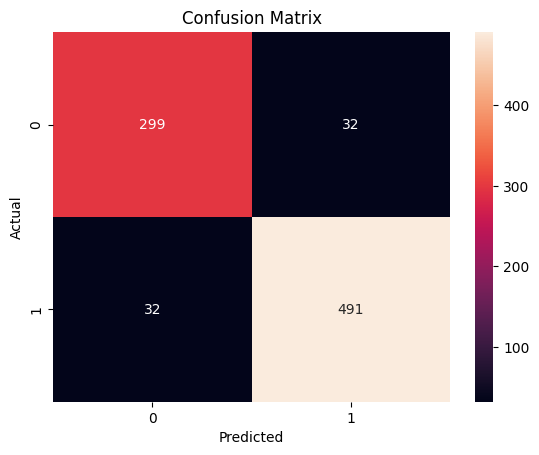

In [15]:
c_matrix = confusion_matrix(Y_test, Y_prediction)
sns.heatmap(c_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

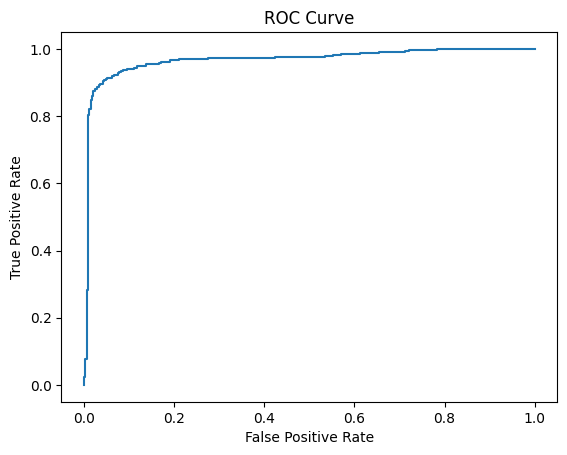

In [16]:
Y_probability = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_probability)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
auc_score = roc_auc_score(Y_test, Y_probability)
print("AUC Score:", auc_score)

AUC Score: 0.9669291156643349
